In [1]:
# Importing Necessary Libraries.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
# Reading Dataset into a DataFrame.
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking information about data.
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


## Data Cleaning


In [4]:
# Checking if there are any duplicate records.
data['mobile_number'].value_counts().sum()

99999

<hr>Since number of rows is same as distinct mobile numbers, there is no duplicate data


In [5]:
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
data = data.set_index('mobile_number')

In [6]:
# Renaming columns 
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [7]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [8]:
# Converting all the above columns having <=29 unique values into categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [9]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [10]:
#Changing datatype of date variables to datetime.
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [11]:
# Checking the date format
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


<hr> Lets convert the above columns to datetime data type.



In [12]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


Filtering High Value Customers¶
<hr> Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.


In [13]:
#Deriving Average recharge amount of June and July.
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [14]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

## Missing Values

In [15]:
#Checking for missing values.
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
date_of_last_rech_data_6,datetime64[ns],62.02
total_rech_data_6,float64,62.02
arpu_3g_6,float64,62.02
fb_user_6,category,62.02
count_rech_3g_6,category,62.02


In [16]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [17]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [18]:
# Looking at remaining columns with missing values 
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
roam_og_mou_9,float64,28307,1704,5.68,4004
std_ic_t2f_mou_9,float64,28307,1704,5.68,1971
std_og_t2c_mou_9,category,28307,1704,5.68,1
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
std_og_t2f_mou_9,float64,28307,1704,5.68,1595


<hr> data contains information of 04 months - 6,7,8,9.
<hr> For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
<hr> hence, missing value treatment could be performed month wise.


In [19]:
# Month 6 


In [20]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


### Note that all the columns with *_mou have exactly 3.94% rows with missing values.
##### This is an indicator of a meaningful missing values.
##### Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.94% customers not using calling plans.
##### This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.


In [21]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [22]:
# Looking at all sixth month columns where rows of *_mou are null
condition = data[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


<hr> Hence, these could be imputed with 0


In [23]:
# Imputation
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


<hr> Looks like there '1.61%' customers with missing date of last recharge. Let's look at 'recharge' related columns for such customers


In [24]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [25]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()


total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

##### Notice, that the recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. 
##### From the first few rows of the output, we see that this is 0.
##### Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.
These are meaning missing values

In [26]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


<hr> No more Missing Values in 6th month columns


In [27]:
# Month : 7 
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [28]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


##### Note that all the columns with *_mou have exactly 3.86% rows with missing values.
##### This is an indicator of a meaningful missing values.
##### Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.86% customers not using calling plans.
##### This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [29]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [30]:
# Looking at all 7th month columns where rows of *_mou are null
condition = data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])


Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


<hr>Hence, these could be imputed with 0


In [31]:
# Imputation
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


<hr>Looks like there '1.77%' customers with missing date of last recharge. Let's look at 'recharge' related columns for such customers


In [32]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [33]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()


total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

##### Notice, that the recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value. 
##### From the first few rows of the output, we see that this is 0.
##### Hence, 'date_of_last_rech_7' is missing since there were no recharges made in this month.
##### These are meaning missing values

In [34]:
# Month : 8 


In [35]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [36]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [37]:
# Looking at all 8th month columns where rows of *_mou are null
condition = data[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [38]:
# Imputation
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [39]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [40]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()


total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [41]:
# Month : 9


In [42]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [43]:
#  columns with meaningful missing in 9th month 
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [44]:
# Looking at all 9th month columns where rows of *_mou are null
condition = data[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [45]:
# Imputation
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [46]:
# Looking at 'recharge' related 9th month columns for customers with missing 'date_of_last_rech_9' 
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [47]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()


total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [48]:
# Imputing "last_date_of_month_*"


In [49]:
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


In [50]:
# Imputing last_date_of_month_* values
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [51]:
data['last_date_of_month_7'].unique()


array(['7/31/2014'], dtype=object)

In [52]:
metadata = metadata_matrix(data)
metadata


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
loc_ic_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
isd_ic_mou_6,float64,30011,0,0.00,3429
total_ic_mou_6,float64,30011,0,0.00,20602
total_ic_mou_7,float64,30011,0,0.00,20711


In [53]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [54]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

Dropping columns with one unique value.


In [55]:
metadata=metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values
#data.loc[metadata_matrix(data)['Unique_Values_Count']==1].index

In [56]:
#Dropping singular value columns.
data.drop(columns=singular_value_cols,inplace=True)

In [57]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
spl_ic_mou_7,float64,30011,0,0.0,93
spl_ic_mou_8,float64,30011,0,0.0,85
spl_ic_mou_9,float64,30011,0,0.0,287
isd_ic_mou_6,float64,30011,0,0.0,3429
isd_ic_mou_7,float64,30011,0,0.0,3639


Tagging Churn (TARGET variable)


In [58]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [59]:
# Churn proportions
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


Dropping Churn Phase Columns


In [60]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
5,onnet_mou_8
6,offnet_mou_6
7,offnet_mou_7
8,offnet_mou_8
9,roam_ic_mou_6


In [61]:
print('retained no of rows', data.shape[0])
print('retain no of columns', data.shape[1])

retained no of rows 30011
retain no of columns 126


Exploratory Data Analysis


<hr> Summary Statistics


In [62]:
data.describe()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.47715

<hr>The telecom company has many users with negative average revenues in both phases. These users are likely to churn


In [63]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


Univariate Analysis


In [64]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

<hr> Age on Network


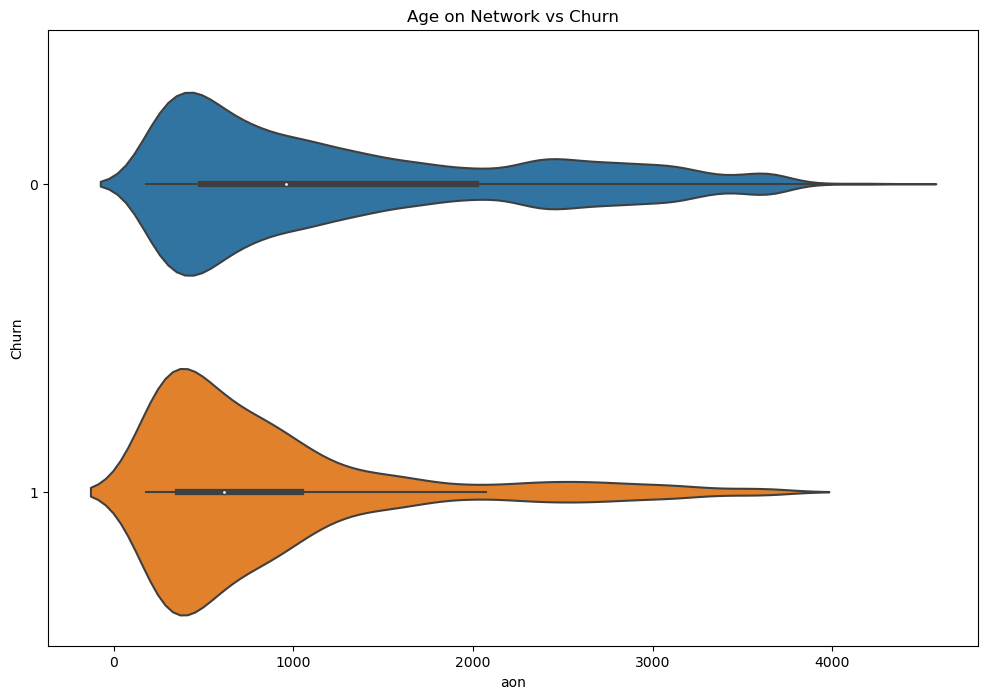

In [65]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

<hr>plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

In [66]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [67]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

<hr> arpu_6, arpu_7 , arpu_8


Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



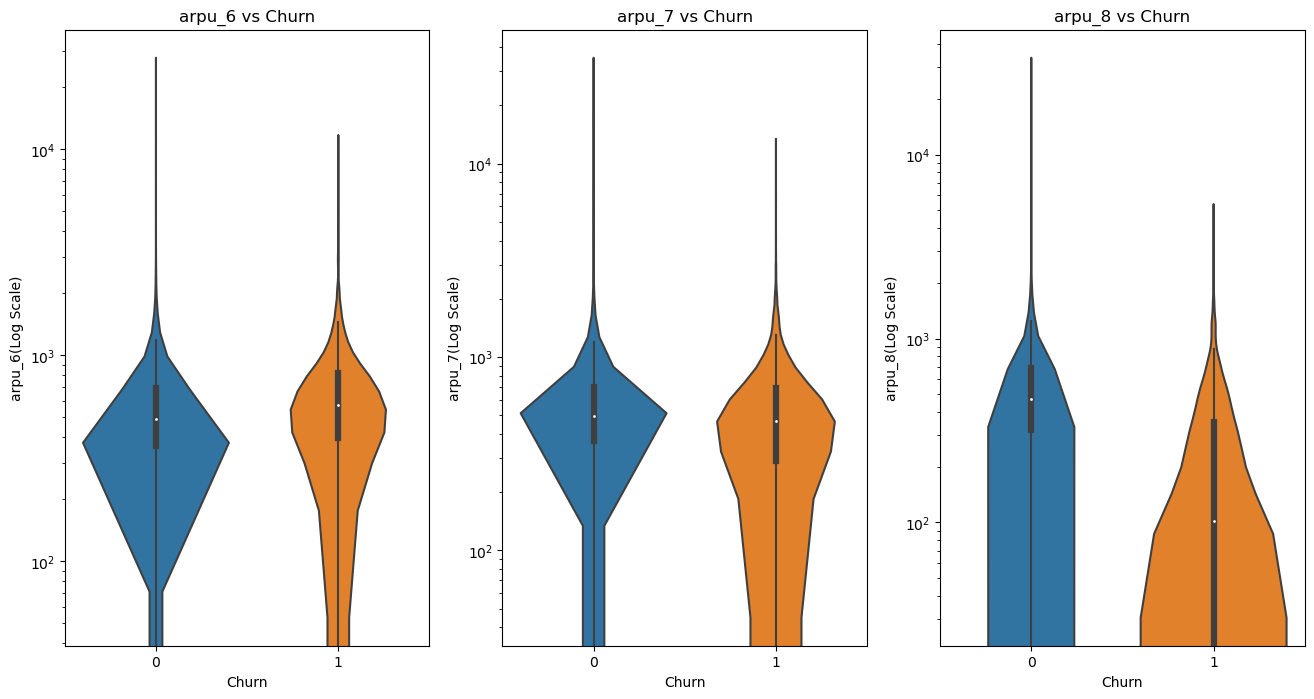

In [68]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

##### We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
##### The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

<hr> total_og_mou_6, total_og_mou_7, total_og_mou_8¶


Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2593.000000     2593.000000     2593.000000
mean       867.961342      677.868909      225.083741
std        852.697688      786.961399      471.672718
min          0.000000        0.000000        0.000000
25%        277.880000      110.090000        0.000000
50%        658.360000      466.910000        0.000000
75%       1209.040000      926.760000      255.810000
max       8488.360000     8285.640000     5206.210000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27418.000000    27418.000000    27418.000000
mean       669.554896      712.080684      661.480046
std        636.531612      674.580516      691.079113
min          0.000000        0.000000        0.000000
25%        265.682500      284.500000      227.970000
50%        500.410000      529.935000      470.475000
75%        872.070000      931.197500      866.045000
max    

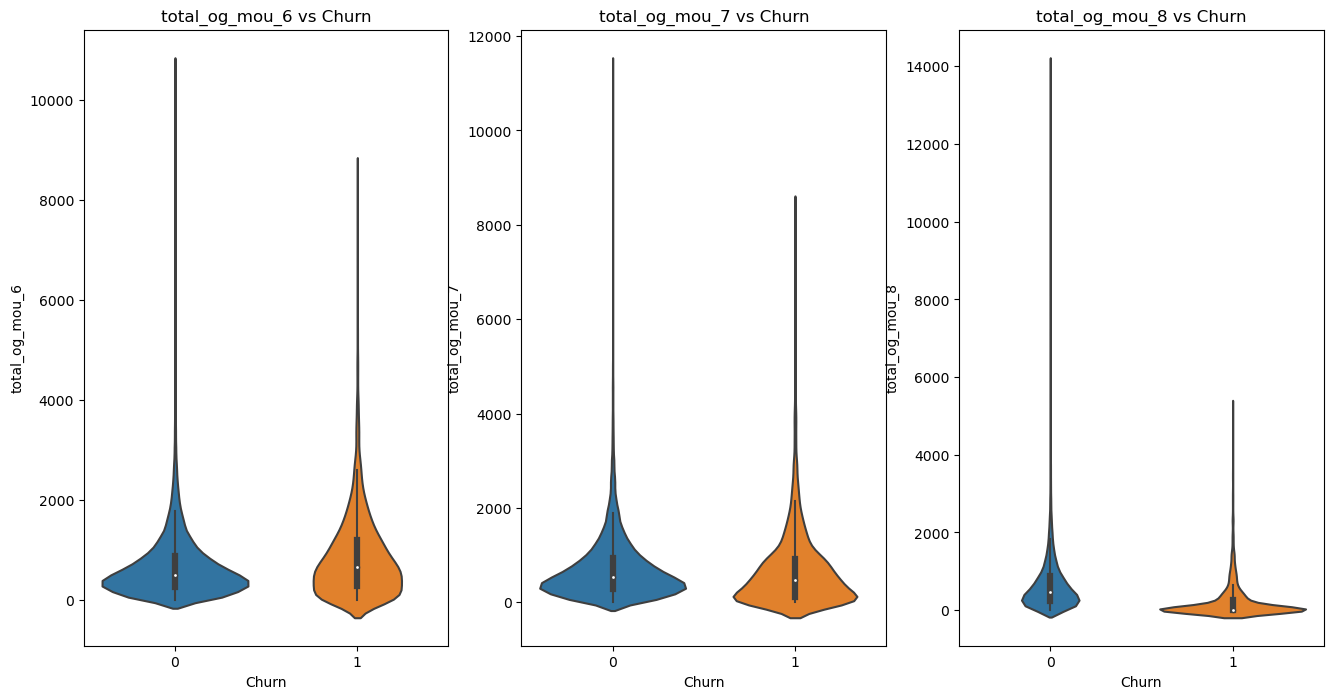

In [69]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

##### The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.


<hr> 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'


Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2593.000000     2593.000000     2593.000000
mean       241.954404      193.341076       68.807042
std        360.836586      318.183813      154.450340
min          0.000000        0.000000        0.000000
25%         49.460000       27.890000        0.000000
50%        137.330000       99.980000        0.000000
75%        289.510000      235.740000       70.290000
max       6633.180000     5137.560000     1859.280000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27418.000000    27418.000000    27418.000000
mean       313.712052      326.369333      316.858595
std        360.580253      372.112086      366.818717
min          0.000000        0.000000        0.000000
25%         94.460000      107.802500       98.265000
50%        212.160000      222.290000      212.360000
75%        401.602500      410.182500      402.270000
max    

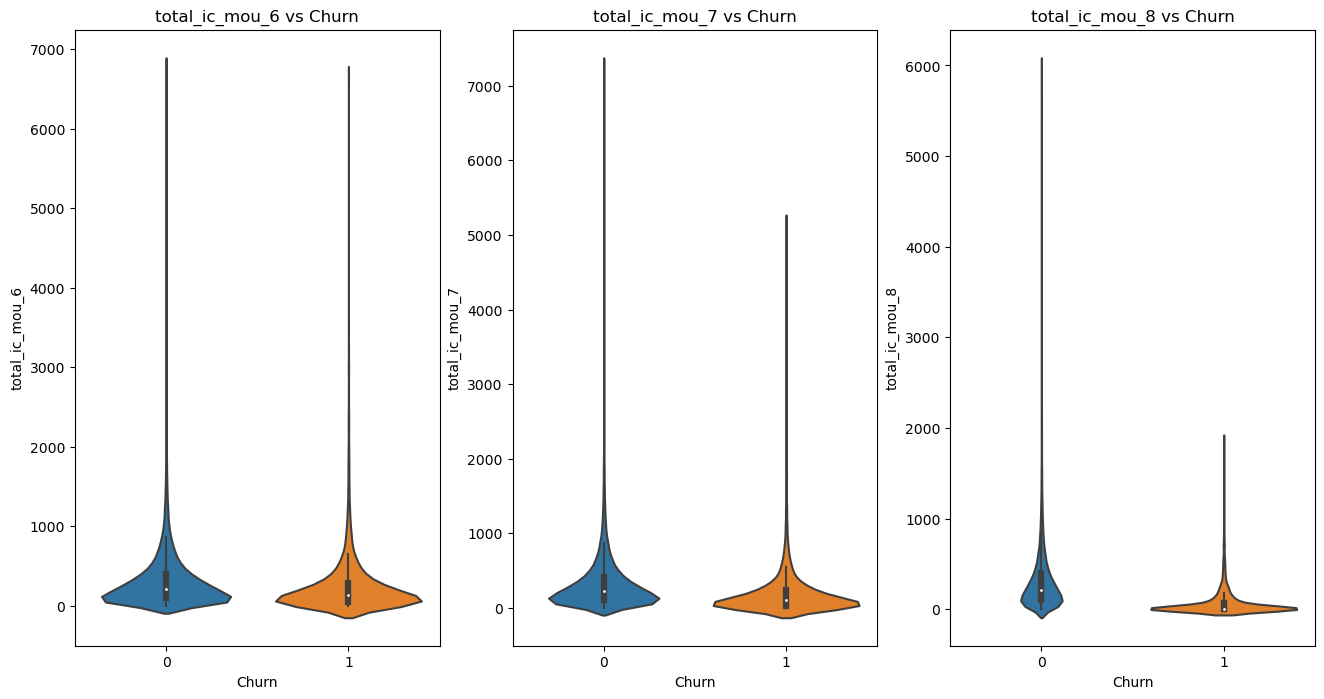

In [70]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

##### The Customers with decrease in rate of total_ic_mou in 7th month are more likely to churn, compared to the rest.


<hr> vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8¶


Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



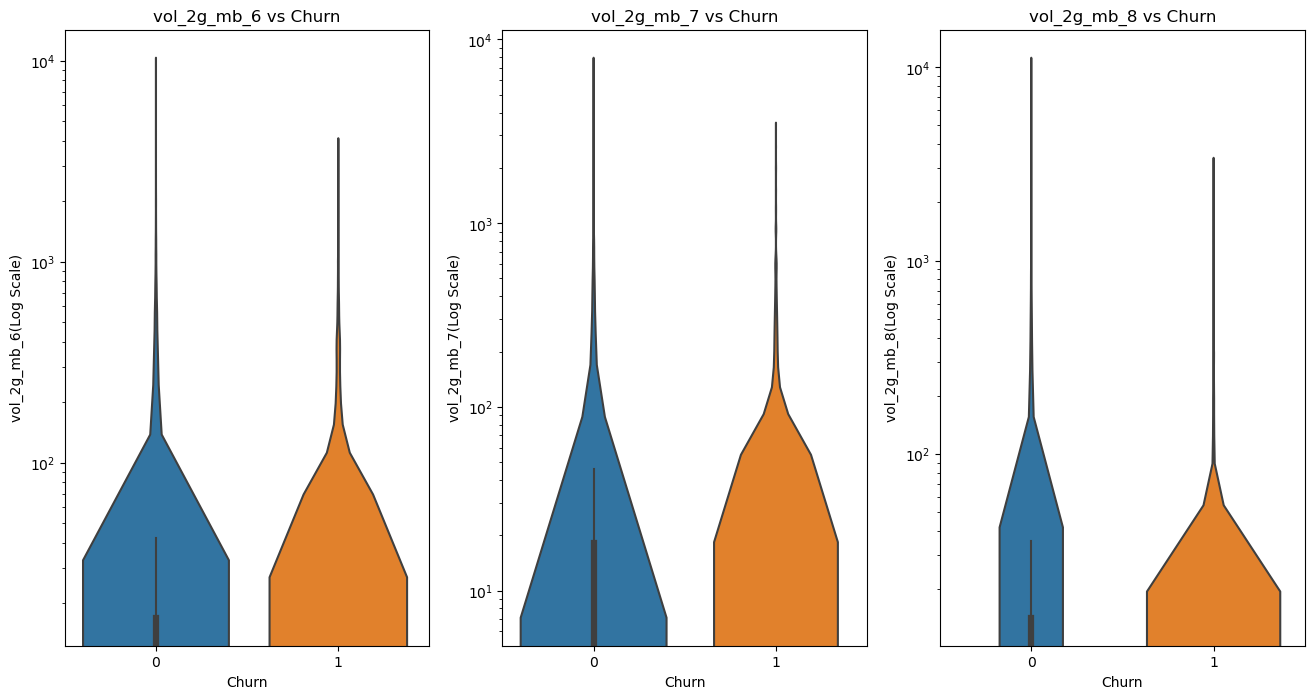

In [71]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

##### Customers with stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
##### Customers with fall in consumption of 2g volumes in 7th month are more likely to Churn.

<hr> vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, monthly_3g_6¶


Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

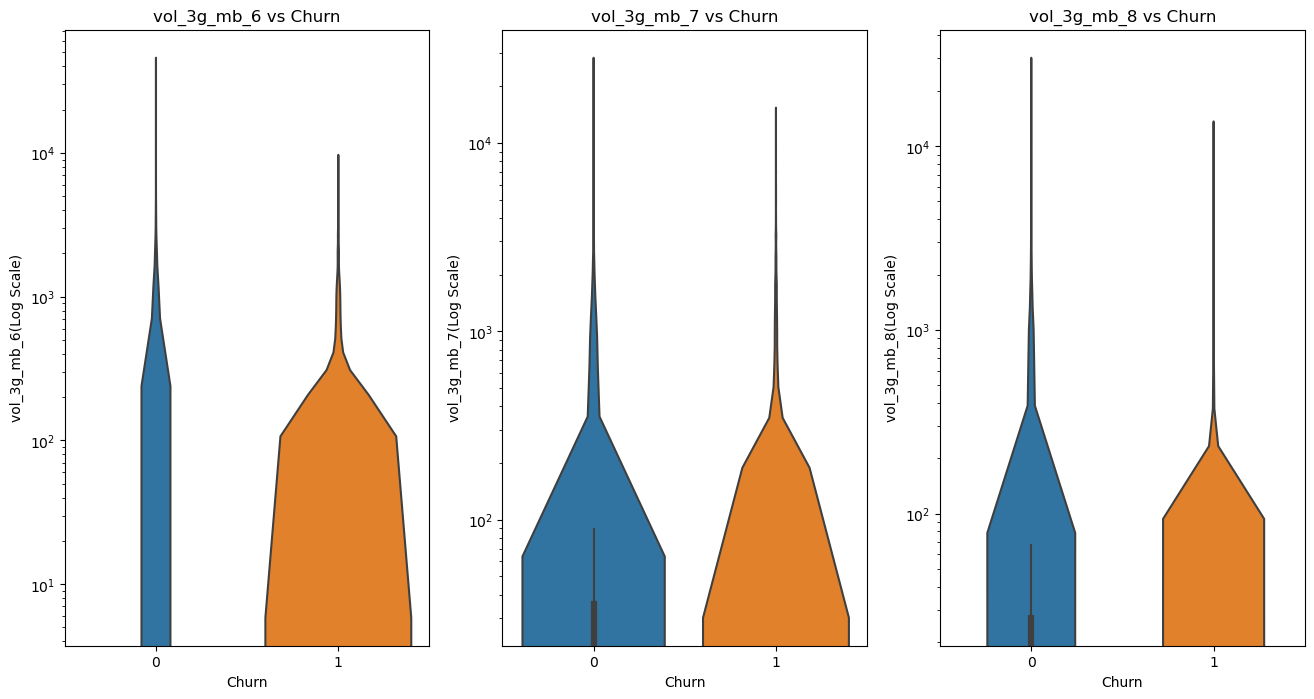

In [72]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

##### Customers with stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
##### Customers with fall in consumption of 3g volumes in 7th month are more likely to Churn.

<hr> monthly_2g_6, monthly_2g_7, monthly_2g_8


Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

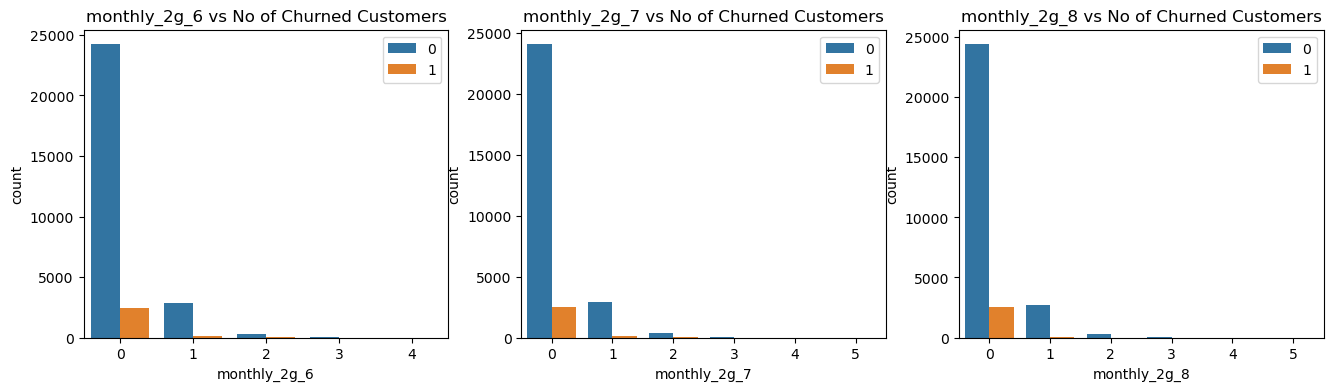

In [73]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

<hr> monthly_3g_6, monthly_3g_7, monthly_3g_8


Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

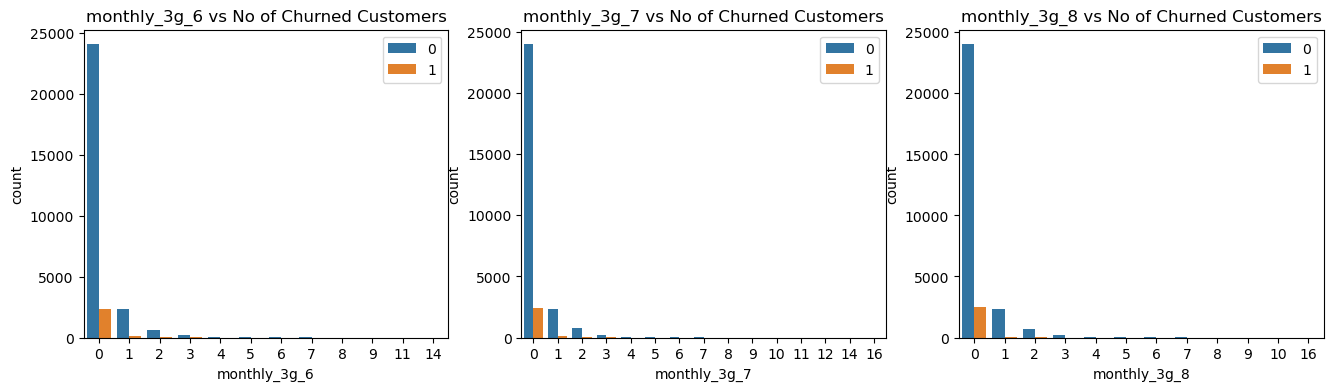

In [74]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

<hr>sachet_3g_6, sachet_3g_7, sachet_3g_8


sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |    

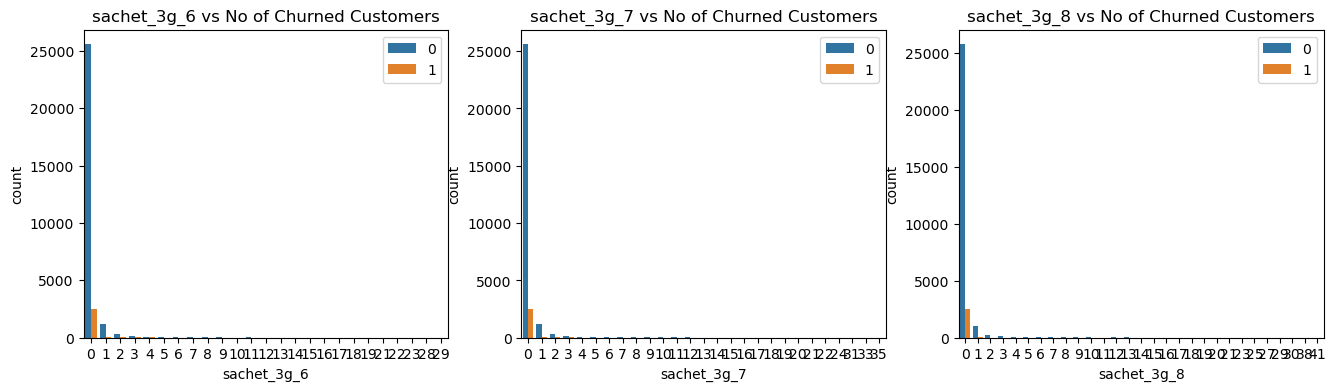

In [75]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

<hr> aug_vbc_3g, jul_vbc_3g, jun_vbc_3g


Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



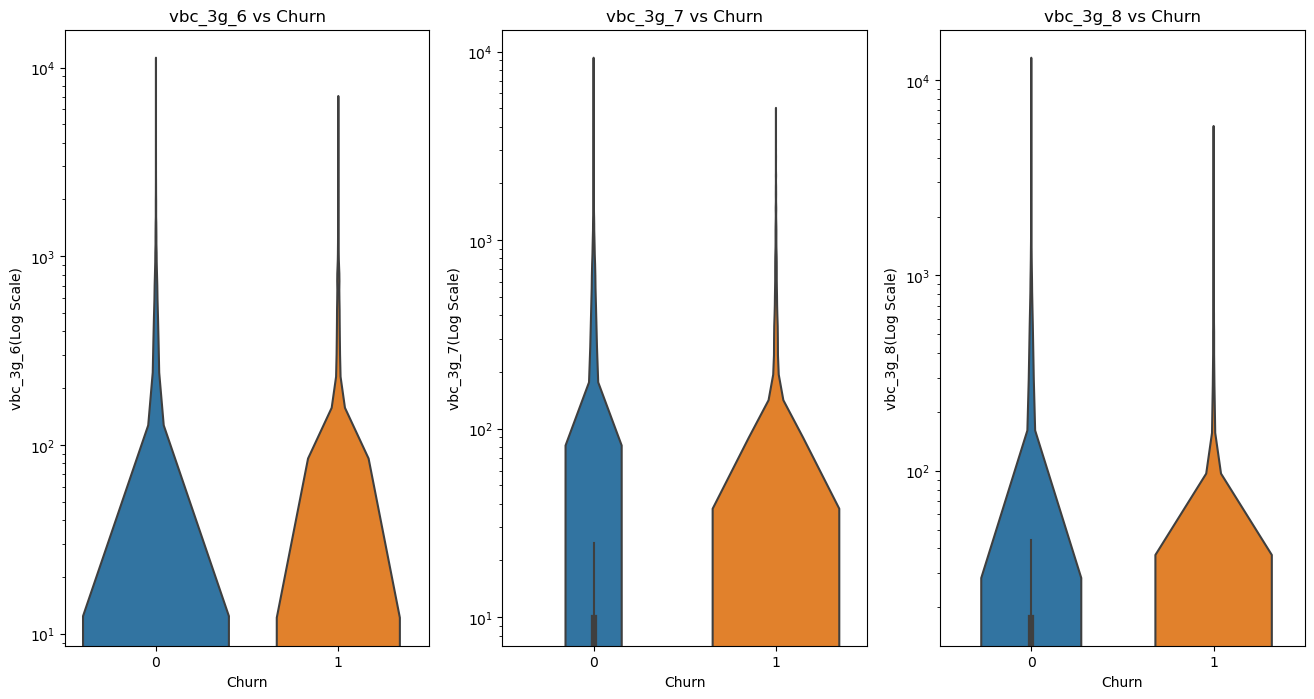

In [76]:
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

Bivariate Analysis

In [77]:
data.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,7

<hr>'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn.


<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

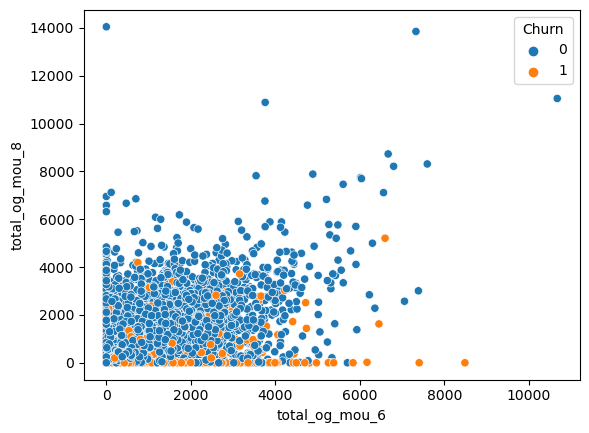

In [78]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])


<hr>'total_og_mou_7' vs 'total_og_mou_8' with respect to Churn.¶


<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

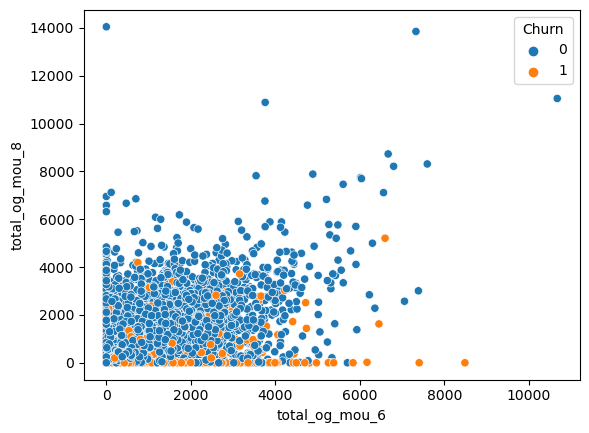

In [79]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])


<hr>'aon' vs 'total_og_mou_8' with respect to Churn.


<AxesSubplot:xlabel='aon', ylabel='total_og_mou_8'>

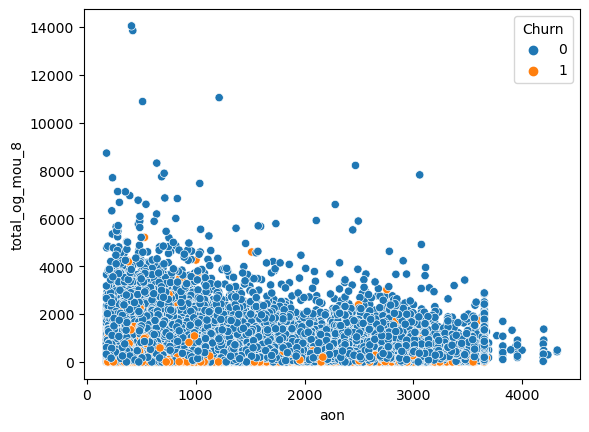

In [80]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['Churn'])


<AxesSubplot:xlabel='aon', ylabel='total_ic_mou_8'>

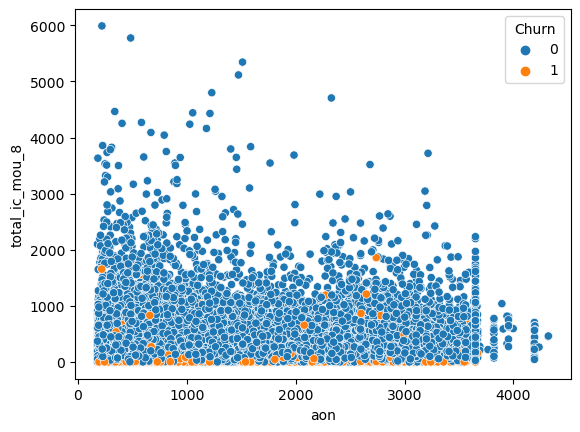

In [81]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['Churn'])


<hr> 'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'.


<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

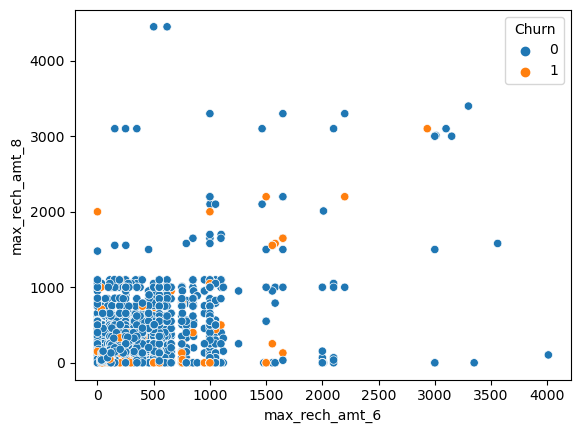

In [82]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['Churn'])


Correlation Analysis


In [83]:
# function to correlate variables
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [84]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 
pd.set_option('precision', 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

OptionError: 'Pattern matched multiple keys'

In [85]:
# Correlations for Churn : 1  - churned customers
# Absolute values are reported 
pd.set_option('precision', 2)
cor_1 = correlation(churned_customers)

# filtering for correlations >= 40%
condition = cor_1['CORR'] > 0.4
cor_1 = cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu').hide_index()

OptionError: 'Pattern matched multiple keys'

Data Preparation
<hr> Derived Variables



In [86]:
# Derived variables to measure change in usage 

# Usage 
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)


In [87]:
# Removing variables used for derivation : 
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

<hr> Outlier Treatment


In [88]:
# Looking at quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2846.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,69.830000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2910.100000,1156.000000,39.883000,227.151000,377.460500,161.801000,95.325000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864

In [89]:
# Looking at percentage change in quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.252284,3.398927,33.678565,33.559312,9.386646,9.844535,36.510096,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.443215,3.979239,34.548555,27.360654,11.261178,9.607481,33.756098,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.61657

In [90]:
# Columns with outliers 
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [91]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
5,offnet_mou_8,2211.64200,301
6,roam_ic_mou_6,349.35300,301
7,roam_ic_mou_7,292.54000,301
8,roam_ic_mou_8,288.48500,301
9,roam_og_mou_6,543.70900,301


In [92]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

<hr> Grouping Categories with less Contribution


In [93]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |   82.5631     |
|  1 |    7.87378    |
|  2 |    3.3621     |
|  3 |    2.0126     |
|  4 |    1.32951    |
|  5 |    0.703076   |
|  6 |    0.509813   |
|  7 |    0.356536   |
|  8 |    0.286562   |
|  9 |    0.239912   |
| 10 |    0.17327    |
| 12 |    0.146613   |
| 11 |    0.0999633  |
| 13 |    0.0566459  |
| 14 |    0.0533138  |
| 15 |    0.0433175  |
| 17 |    0.0366532  |
| 19 |    0.029989   |
| 18 |    0.029989   |
| 16 |    0.0233248  |
| 22 |    0.0133284  |
| 20 |    0.00999633 |
| 21 |    0.00999633 |
| 24 |    0.00999633 |
| 25 |    0.00999633 |
| 27 |    0.00333211 |
| 30 |    0.00333211 |
| 32 |    0.00333211 |
| 34 |    0.00333211 |
| 39 |    0.00333211 |
| 28 |    0          |
| 42 |    0          |
+----+---------------+ 

Replaced [5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 17, 19, 18, 16, 22, 20, 21, 24, 25, 27, 30, 32, 34, 39, 28, 42] in sachet_2g_6 with category : Others

 +----+---------

Creating Dummy Variables


In [94]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7001524846,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7002191713,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7000875565,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7000187447,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [95]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_2g_6_Others',
 'sachet_2g_7_Others',
 'sachet_3g_8_Others',
 'sachet_3g_6_Others',
 'sachet_2g_8_Others',
 'sachet_3g_7_Others']

In [96]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5,5,7,1000,790,951,0,0,619,0,0,0,0,0,0,802,1185.0,1,0.00,0.000,-198.225,-163.510,38.680,864.34085,1036.4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19,21,14,90,154,30,50,0,10,0,1,0,0,0,0,315,519.0,0,-177.97,-363.535,-298.450,-49.635,-495.375,-298.11000,-399.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,6,4,11,110,110,130,110,50,0,0,0,0,0,0,0,2607,380.0,0,0.02,0.000,465.510,573.935,0.000,244.00150,337.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
7000875565,50

In [97]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [98]:
data.shape


(30011, 131)

Train-Test Split


In [99]:
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

Class Imbalance


In [101]:
y.value_counts(normalize=True).to_frame()


,Churn
0,0.913598
1,0.086402


In [102]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


Using SMOTE


In [103]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [104]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,0.0,0.0,53.01,52.64,37.48,282.38,171.64,44.51,31.59,17.38,19.43,0.0,0.0,0.00,366.99,241.68,101.43,0.00,0.00,0.00,0.00,2.11,0.00,2.03,4.59,4.41,2.03,6.71,4.41,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,18.41,40.79,11.79,292.99,191.98,85.89,6.26,1.21,10.39,317.68,233.99,108.09,0.00,0.00,0.00,0.66,0.00,0.00,5.61,1.53,2.76,6.28,1.53,2.76,0.00,0.0,0.00,0.00,0.00,9.55,0.00,0.00,0.00,6,5,4,198,198,198,110,130,130,1,1,1,0,0,0,1423,483.0,-791.7700,1077.750,-202.870,-159.335,71.085,-172.4995,-155.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,0.0,0.0,40.36,36.21,27.73,37.26,36.73,59.61,0.00,0.00,0.00,0.0,0.0,0.58,77.63,72.94,87.34,51.03,179.93,122.84,465.96,265.24,356.44,0.00,0.00,0.00,516.99,445.18,479.29,0.96,0.0,3.89,0.0,0.0,14.45,0.0,0.0,0.0,104.39,31.98,35.83,154.11,147.88,243.53,0.00,0.76,0.00,258.51,180.63,279.36,4.03,2.99,0.46,6.36,12.31,3.91,0.00,0.00,0.00,10.39,15.31,4.38,0.58,0.0,0.25,19.66,21.96,86.63,0.23,0.56,1.04,8,11,12,110,130,130,0,130,0,0,0,0,0,0,0,189,454.0,0.0000,0.000,28.130,117.745,0.000,48.6160,-94.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.96,14.13,0.40,1.51,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,13.48,14.13,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,20.58,20.39,97.66,36.84,21.58,18.66,5.48,0.73,1.43,62.91,42.71,117.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,3,4,252,252,252,252,0,252,0,0,0,2,1,2,2922,403.0,-44.6300,-5.525,-13.405,64.950,0.000,75.3940,151.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,0.0,0.0,24.46,19.79,37.74,41.26,47.86,39.43,1.19,4.04,0.00,0.0,0.0,0.00,66.93,71.71,77.18,508.19,517.51,700.46,6.56,18.24,0.00,0.00,1.48,0.00,514.76,537.24,700.46,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,19.86,28.81,20.24,66.08,94.18,67.54,51.74,68.16,50.08,137.69,19

Standardizing Columns


In [105]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [106]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [107]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.0,38374.0,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.0,0.0,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,12.66,11.42,7.67,159.44,156.00,119.18,95.03,86.67,62.18,0.07,0.08,0.06,0.12,0.11,0.10,1074.47,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.56,8.49,7.80,147.97,150.12,138.14,102.68,102.56,97.92,0.29,0.29,0.26,0.42,0.42,0.39,886.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,-0.36,-0.36,-0.50,-0.49,-0.42,-0.75,-0.73,-0.59,-0.38,-0.38,-0.33,-0.37,-0.37,-0.31,-0.76,-0.74,-0.60,-0.57,-0.54,-0.40,-0.60,-0.57,-0.43,-0.22,-0.22,-0.19,-0.79,-0.74,-0.53,-0.20,-0.18,-0.15,-0.51,-0.53,-0.43,-0.44,0.0,0.0,-0.61,-0.57,-0.48,-0.77,-0.75,-0.61,-0.40,-0.39,-0.35,-0.80,-0.

Modelling


<hr> Model 1 : Interpretable Model : Logistic Regression


<hr>Baseline Logistic Regression Model


In [108]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [109]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

Baseline Performance



In [110]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))


In [111]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [112]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15993  3194]
 [  322  1498]]

Confusion Matrix for test: 
 [[6785 1446]
 [ 305  468]]


In [113]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.823
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.319
F1-score : 0.46


Test Performance : 

Accuracy : 0.806
Sensitivity / True Positive Rate / Recall : 0.605
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.245
F1-score : 0.349


<hr> Baseline Performance - Finding Optimum Probability Cutoff



In [114]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [115]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.975,0.341,0.396
0.2,0.947,0.521,0.558
0.3,0.911,0.656,0.679
0.4,0.866,0.761,0.770
0.5,0.823,0.834,0.833
0.6,0.771,0.883,0.873
0.7,0.673,0.921,0.899
0.8,0.488,0.954,0.913
0.9,0.229,0.981,0.916


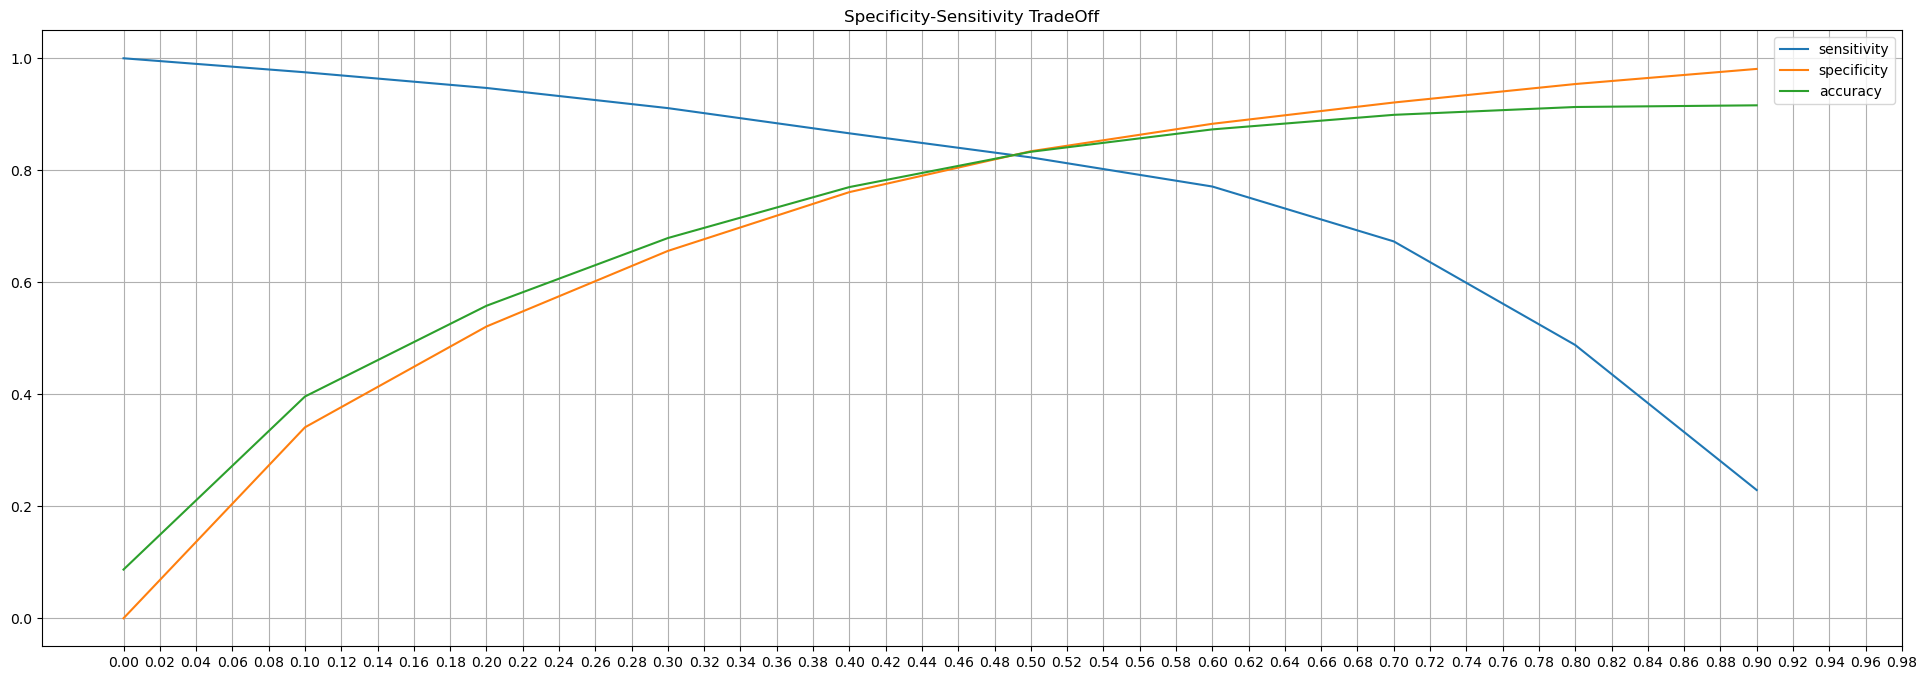

In [116]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

Baseline Performance at Optimum Cutoff


In [117]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15879  3308]
 [  318  1502]]

Confusion Matrix for test: 
 [[6497 1734]
 [ 249  524]]


In [118]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.78
Sensitivity / True Positive Rate / Recall : 0.678
Specificity / True Negative Rate :  0.789
Precision / Positive Predictive Value : 0.232
F1-score : 0.346


In [119]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.778


<hr> Feature Selection using RFE


In [123]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results

RFE(estimator=LogisticRegression(class_weight='balanced', random_state=100),
    n_features_to_select=15)

In [124]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
62,std_ic_t2t_mou_8,1,True
56,loc_ic_t2f_mou_8,1,True
35,std_og_t2f_mou_8,1,True
121,sachet_2g_8_0,1,True
118,sachet_3g_6_0,1,True
116,sachet_3g_8_0,1,True
110,sachet_2g_7_0,1,True
67,std_ic_t2f_mou_7,1,True
105,sachet_2g_6_0,1,True
34,std_og_t2f_mou_7,1,True
